In [1]:
import pandas as pd

snps_all=pd.read_csv("/oak/stanford/groups/akundaje/projects/cad/data/clint_data/rasqual_results/revisions/smc/smc_4_results_081921_2.txt", sep="\t", header=0)
snps2=pd.read_csv("/oak/stanford/groups/akundaje/projects/cad/data/clint_data/rasqual_results/revisions/smc/SMC_rasqual_results_FDR_0.05_083121.txt", sep="\t", header=0)

snps_all = snps_all.replace({",": 'comma'}, regex=True)
snps_all = snps_all.replace({"_": '--'}, regex=True)
snps_all.columns = snps2.columns[0:25]

snps_all.columns

Index(['Feature_ID', 'rsID', 'Chromosome', 'SNP_position', 'Ref_allele',
       'Alt_allele', 'Freq', 'HWE_Chisquare', 'Imp_quality', 'Log10_BH_Q',
       'Chisquare', 'Effect_size', 'Delta', 'Phi', 'Overdispersion',
       'SNP_id_region', 'Num_feature_SNPs', 'Num_tested_SNPs',
       'Num_iterations_null', 'Num_iterations_alt', 'Random_ties',
       'Log_likelihood_null', 'Convergence_status', 'Sq_corr_fSNPs',
       'Sq_corr_rSNP'],
      dtype='object')

In [2]:
preds = pd.read_csv("/mnt/lab_data2/anusri/variant-scorer/src/output/smc_caqtls/ATAC_sig_only/summary.mean.variant_scores_new.tsv", sep="\t", header=0)
preds[snps_all.columns] = preds["rsid"].str.split(",", expand=True)
preds[snps_all.columns].head()

,Feature_ID,rsID,Chromosome,SNP_position,Ref_allele,Alt_allele,Freq,HWE_Chisquare,Imp_quality,Log10_BH_Q,...,SNP_id_region,Num_feature_SNPs,Num_tested_SNPs,Num_iterations_null,Num_iterations_alt,Random_ties,Log_likelihood_null,Convergence_status,Sq_corr_fSNPs,Sq_corr_rSNP
0,chr10.100006344.100006745,rs11592868,chr10,100009635,T,G,0.4625,0.843225,0.999948,-0.7851329981,...,3.275177,2,50,4,3,100009635,2.374082,0,0.982096,0.993065
1,chr10.100008240.100008641,rs11190364,chr10,100006780,C,T,0.3125,0.647934,0.999939,-1.8697830229,...,2.589123,2,50,5,4,100005358,4.610132,0,0.989587,0.992047
2,chr10.100008812.100009213,rs11593328,chr10,100015645,T,C,0.4,0.15625,0.999947,-0.3408101516,...,2.632266,1,50,4,5,100018116,1.04081,0,0.990291,0.992138
3,chr10.100009332.100009733,rs12783181,chr10,100015400,G,A,0.2875,0.286748,0.999936,-0.4710837639,...,4.542324,1,50,6,5,100015400,0.429945,0,0.901012,0.991069
4,chr10.100009818.100010219,rs12261919,chr10,100001413,G,T,0.5375,0.079659,0.975202,-0.5253220851,...,5.472201,0,50,5,4,100001413,0.660478,0,nan,0.949196


In [3]:
snps_all.shape

(239816, 25)

In [4]:
preds.shape

(238534, 48)

In [5]:
snps_all.columns

Index(['Feature_ID', 'rsID', 'Chromosome', 'SNP_position', 'Ref_allele',
       'Alt_allele', 'Freq', 'HWE_Chisquare', 'Imp_quality', 'Log10_BH_Q',
       'Chisquare', 'Effect_size', 'Delta', 'Phi', 'Overdispersion',
       'SNP_id_region', 'Num_feature_SNPs', 'Num_tested_SNPs',
       'Num_iterations_null', 'Num_iterations_alt', 'Random_ties',
       'Log_likelihood_null', 'Convergence_status', 'Sq_corr_fSNPs',
       'Sq_corr_rSNP'],
      dtype='object')

In [6]:
snps_all.shape

(239816, 25)

In [7]:
preds.columns

Index(['chr', 'pos', 'allele1', 'allele2', 'rsid', 'logfc.mean',
       'abs_logfc.mean', 'abs_logfc.mean.pval', 'jsd.mean', 'jsd.mean.pval',
       'logfc_x_jsd.mean', 'abs_logfc_x_jsd.mean', 'abs_logfc_x_jsd.mean.pval',
       'max_percentile.mean', 'max_percentile.mean.pval',
       'logfc_x_max_percentile.mean', 'abs_logfc_x_max_percentile.mean',
       'abs_logfc_x_max_percentile.mean.pval', 'jsd_x_max_percentile.mean',
       'jsd_x_max_percentile.mean.pval',
       'abs_logfc_x_jsd_x_max_percentile.mean',
       'abs_logfc_x_jsd_x_max_percentile.mean.pval',
       'logfc_x_jsd_x_max_percentile.mean', 'Feature_ID', 'rsID', 'Chromosome',
       'SNP_position', 'Ref_allele', 'Alt_allele', 'Freq', 'HWE_Chisquare',
       'Imp_quality', 'Log10_BH_Q', 'Chisquare', 'Effect_size', 'Delta', 'Phi',
       'Overdispersion', 'SNP_id_region', 'Num_feature_SNPs',
       'Num_tested_SNPs', 'Num_iterations_null', 'Num_iterations_alt',
       'Random_ties', 'Log_likelihood_null', 'Convergence_st

In [8]:
sum(preds['Log10_BH_Q'].astype(float)<-2.8759)

1984

In [9]:
import numpy as np
np.max(snps2['Log10_BH_Q'])

-2.8759227842

In [10]:
np.min(snps2['Log10_BH_Q'])

-40.136213949

In [11]:
snps2.shape

(1984, 47)

In [12]:
from scipy.stats import pearsonr

In [19]:
import matplotlib


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.rcParams['figure.figsize'] = [12, 10]

def plot_enrichment_curves(df, compare_score, model_score, output_file, compare_score_ascending=False, model_score_ascending=True,
                           thresh_list=[0.5, 0.1, 0.05, 0.01, 0.005], subsample=False, ymax='auto', debug=False):
    by_thresh_dict = {'score':[], 'ratio':[], 'thresh':[]}
    
    for thresh in thresh_list:
        df[compare_score].fillna(0, inplace=True)
        sample_df = df.sort_values(by=[compare_score, model_score], ascending=[False, True])
        #print(sample_df.head())
        #print(sample_df.tail())
        print(sum(sample_df[model_score] < thresh))
        ratio = len(sample_df.loc[sample_df[model_score] < thresh]) / len(sample_df)
        sample_df['sig'] = sample_df[model_score].apply(lambda x: x < thresh)
        sample_df['expected'] = [ratio] * len(sample_df)
        expected = sample_df['expected'].cumsum().tolist()
        observed = sample_df['sig'].cumsum().tolist()
        
        enrich_ratio = np.array(observed) / np.array(expected)
        compare_vals = sample_df[compare_score].tolist()
        enrich_ratio = enrich_ratio.tolist()
        assert len(compare_vals) == len(enrich_ratio)
        by_thresh_dict['ratio'].extend(enrich_ratio)
        by_thresh_dict['score'].extend(compare_vals)
        by_thresh_dict['thresh'].extend([thresh] * len(sample_df))
        
        if debug:
            print(thresh)
            print('Expected:', expected[:10])
            print('Observed:', observed[:10])
            print('Ratio:', enrich_ratio[:10])
            print('Compare Scores:', compare_vals[:10])
            print()
        
    by_thresh_df = pd.DataFrame(by_thresh_dict)
    by_thresh_df.sort_values(by=['score'], ascending=False, inplace=True)
    return by_thresh_df

In [20]:
preds["Log10_BF"] = preds["Log10_BH_Q"].astype(float)*-1
by_thresh_df = plot_enrichment_curves(preds,
                       compare_score='Log10_BF', model_score='abs_logfc_x_jsd_x_max_percentile.mean.pval',
                       compare_score_ascending=False, model_score_ascending=True, output_file="lcl_caqtls_latest.pdf")

118411
20430
10095
2453
1362


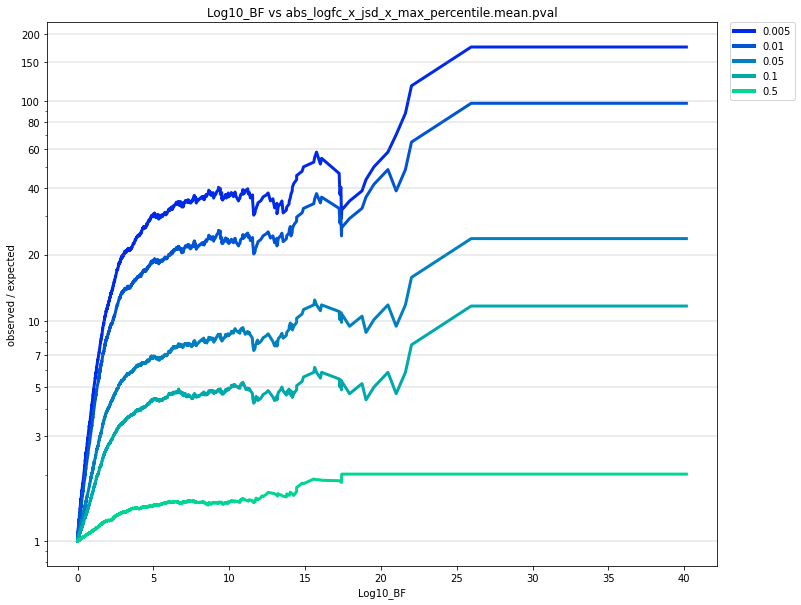

In [31]:

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 
import seaborn as sns
compare_score='Log10_BF'
model_score='abs_logfc_x_jsd_x_max_percentile.mean.pval'
ax = sns.lineplot(data=by_thresh_df, x='score', y='ratio', linewidth=3, ci=None,
                  hue='thresh', palette=sns.color_palette('winter', 5))
leg = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
for line in leg.get_lines():
    line.set_linewidth(4)
xmax="auto"
ymax="auto"
output_file="lcl_caqtls_latest.pdf"
ax.set(title=compare_score + ' vs ' + model_score, xlabel=compare_score, ylabel='observed / expected')
ax.set(yscale='log')
ax.set_yticks([1,  3,  5, 7, 10, 20, 40, 60, 80, 100, 150,200])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.axhline(y=1, color='grey', linestyle='-', alpha=0.2)

ax.axhline(y=3, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=5, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=7, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=10, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=20, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=40, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=60, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=80, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=100, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=150, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=200, color='grey', linestyle='-', alpha=0.2)

plt.savefig("subfigs_new/"+"smc_caqtls_all.pdf", transparent=True, dpi=300)

In [32]:
preds['jsd_sign'] = preds['jsd.mean'] * np.sign(preds['logfc.mean'])

(0.3997394341780456, 5.223253407212269e-77)


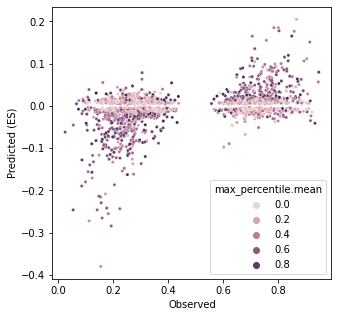

In [33]:
import seaborn as sns
import scipy.stats

plt.figure(figsize=(5,5))
data = pd.DataFrame()
data["Predicted (ES)"] = preds[preds["Log10_BH_Q"].astype(float)<-2.8759]["jsd_sign"]
data["Observed"] = preds[preds["Log10_BH_Q"].astype(float)<-2.8759]["Effect_size"].astype(float)
data["max_percentile.mean"] = abs(preds[preds["Log10_BH_Q"].astype(float)<-2.8759]["max_percentile.mean"])

sns.scatterplot(data=data, y="Predicted (ES)", x="Observed", hue="max_percentile.mean", s=10)
print(scipy.stats.pearsonr(data["Predicted (ES)"],data["Observed"]))

In [34]:
preds["pos1"] = preds["pos"] + 1
old_cols = preds.columns
new_cols  = ["chr", "pos", "pos1"] + old_cols[2:-1].tolist()
preds[new_cols]

,chr,pos,pos1,allele1,allele2,rsid,logfc.mean,abs_logfc.mean,abs_logfc.mean.pval,jsd.mean,...,Num_tested_SNPs,Num_iterations_null,Num_iterations_alt,Random_ties,Log_likelihood_null,Convergence_status,Sq_corr_fSNPs,Sq_corr_rSNP,Log10_BF,jsd_sign
0,chr10,100009635,100009636,T,G,"chr10.100006344.100006745,rs11592868,chr10,100...",0.006190,0.007367,0.831199,0.009882,...,50,4,3,100009635,2.374082,0,0.982096,0.993065,0.785133,0.009882
1,chr10,100006780,100006781,C,T,"chr10.100008240.100008641,rs11190364,chr10,100...",0.001474,0.009650,0.791830,0.006145,...,50,5,4,100005358,4.610132,0,0.989587,0.992047,1.869783,0.006145
2,chr10,100015645,100015646,T,C,"chr10.100008812.100009213,rs11593328,chr10,100...",0.113058,0.113058,0.139362,0.015260,...,50,4,5,100018116,1.04081,0,0.990291,0.992138,0.340810,0.015260
3,chr10,100015400,100015401,G,A,"chr10.100009332.100009733,rs12783181,chr10,100...",-0.119587,0.119587,0.135612,0.012063,...,50,6,5,100015400,0.429945,0,0.901012,0.991069,0.471084,-0.012063
4,chr10,100001413,100001414,G,T,"chr10.100009818.100010219,rs12261919,chr10,100...",-0.009792,0.009792,0.783421,0.006923,...,50,5,4,100001413,0.660478,0,nan,0.949196,0.525322,-0.006923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238529,chr9,99862115,99862116,T,C,"chr9.99859616.99860017,rs7024294,chr9,99862115...",0.046749,0.046749,0.355006,0.010596,...,13,3,3,99862115,1.642292,0,0.991061,0.992296,0.962901,0.010596
238530,chr9,99900933,99900934,A,T,"chr9.99906279.99906680,rs12346763,chr9,9990093...",-0.043854,0.047679,0.401620,0.008175,...,30,4,3,99900933,-0.740242,0,nan,0.990015,0.045387,-0.008175
238531,chr9,99907337,99907338,G,C,"chr9.99906734.99907135,rs12352899,chr9,9990733...",-0.202839,0.202839,0.061324,0.035271,...,31,4,3,99909971,-1.231401,0,nan,0.991607,0.052787,-0.035271
238532,chr9,99900349,99900350,T,C,"chr9.99907206.99907607,rs4742776,chr9,99900349...",0.145110,0.145110,0.102289,0.018292,...,31,6,9,99900349,0.557542,0,0.986182,0.988833,0.357810,0.018292


In [35]:
# preds[new_cols].to_csv("/mnt/lab_data2/anusri/variant-scorer/src/output/smc_caqtls/bed_formatter_regions.bed", sep="\t", header=False, index=False)
# f=pd.read_csv("/oak/stanford/groups/akundaje/projects/cad/outs/7_30_2023_human_all_models/peaks/original/SMC.peaks.bed", sep="\t", header=None)
# df[2] = df[1] + df[9] + 250
# df[1] = df[1] + df[9] - 250
# df.to_csv("/mnt/lab_data2/anusri/variant-scorer/src/output/smc_caqtls/peaks_formatted.bed", sep="\t", index=False, header=False)

In [36]:
new_scores = pd.read_csv("/mnt/lab_data2/anusri/variant-scorer/src/output/smc_caqtls/snps_in_peaks.bed", sep="\t", header=None, names=new_cols+["peak_overlap"])



In [37]:
new_scores["peak_overlap"] = (new_scores["peak_overlap"]>0) & (new_scores["Log10_BH_Q"].astype(float)<-2.8759)
new_scores["Effect_size"] = new_scores["Effect_size"].astype(float)

<AxesSubplot:xlabel='Observed', ylabel='Predicted (ES)'>

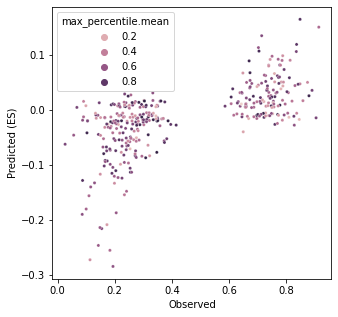

In [39]:
import seaborn as sns

plt.figure(figsize=(5,5))
data = pd.DataFrame()
data["Predicted (ES)"] = new_scores[new_scores["peak_overlap"]]["jsd_sign"]
data["Observed"] = new_scores[new_scores["peak_overlap"]]["Effect_size"]
data["max_percentile.mean"] = abs(new_scores[new_scores["peak_overlap"]]["max_percentile.mean"])

sns.scatterplot(data=data, y="Predicted (ES)", x="Observed", hue="max_percentile.mean", s=10)


      Predicted (ES)  Observed  max_percentile.mean  sd_sign.mean      Beta
660        -0.050136  0.275779             0.177851     -0.050136  0.275779
1535        0.016267  0.358584             0.620328      0.016267  0.358584
1661        0.015680  0.272100             0.542213      0.015680  0.272100
2019       -0.019800  0.347713             0.916965     -0.019800  0.347713
2838        0.036740  0.755112             0.613221      0.036740  0.755112


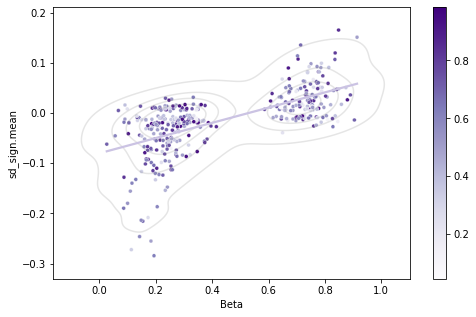

In [46]:
import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

data["sd_sign.mean"] = new_scores[new_scores["peak_overlap"]]["jsd_sign"]
data["Beta"] = new_scores[new_scores["peak_overlap"]]["Effect_size"]
data["max_percentile.mean"] = abs(new_scores[new_scores["peak_overlap"]]["max_percentile.mean"])

print(data.head())
plt.figure(figsize=(8,5))

sns.kdeplot(
    data=data,
    x="Beta",
    y="sd_sign.mean",
    levels=5,
    fill=False,
    alpha=0.2,
    color="grey",
    cut=2,

)
ax = sns.scatterplot(x="Beta", y="sd_sign.mean", hue="max_percentile.mean", data=data, s=15, palette="Purples")
sns.regplot(x="Beta", y="sd_sign.mean", data=data, scatter=False, ci=None, color="#CBC3E3")
#sns.jointplot(x=data["Beta"], y=data["sd_sign.mean"],s=0,ax=ax)

norm = plt.Normalize(data['max_percentile.mean'].min(), data['max_percentile.mean'].max())
sm = plt.cm.ScalarMappable(cmap="Purples", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
ax.get_legend().remove()
ax.figure.colorbar(sm)
plt.savefig("subfigs_new/smc_caqtls_scatter_plot.pdf", transparent=True, dpi=300)


In [43]:
sum(new_scores["peak_overlap"])

365

In [48]:
scipy.stats.pearsonr(data["sd_sign.mean"] ,data["Beta"]  )

(0.6258929514561228, 4.3181928887425475e-41)

In [49]:
from sklearn.decomposition import PCA
import scipy.stats
def get_pc_component(df1):
    val1 = df1["jsd.mean"].astype(float)*np.sign(df1['logfc.mean'].astype(float))
    val2 = df1["logfc.mean"].astype(float)
    val3 = df1["jsd.mean"].astype(float)*df1['logfc.mean'].astype(float)
    #val4 = df1["log_prob_log2s.mean"].astype(float)*df1['logfc.mean'].astype(float)

    #print(df1.shape)
    values = [val2, val3]
    values = np.array(values)
    #print(values.shape)
    values = np.transpose(values)
    mean_axis = np.mean(values, axis=1)
    new_values = PCA(n_components=1).fit_transform(X=values)
    #print(new_values.shape)
    if scipy.stats.pearsonr(new_values[:,0], mean_axis)[0] > 0:
        #print(scipy.stats.pearsonr(new_values[:,0], mean_axis)[0])
        return new_values[:,0]
    else:
        #print(scipy.stats.pearsonr(new_values[:,0], mean_axis)[0])
        return new_values[:,0]*-1

In [52]:
scipy.stats.pearsonr(get_pc_component(new_scores)[new_scores["peak_overlap"]],data["Beta"]  )

(0.6296341356229039, 1.0511861622515106e-41)

In [92]:
preds

,chr,pos,allele1,allele2,rsid,logfc.mean,abs_logfc.mean,abs_logfc.mean.pval,jsd.mean,jsd.mean.pval,...,Num_iterations_null,Num_iterations_alt,Random_ties,Log_likelihood_null,Convergence_status,Sq_corr_fSNPs,Sq_corr_rSNP,Log10_BF,jsd_sign,pos1
0,chr10,100009634,T,G,"chr10.100006344.100006745,rs11592868,chr10,100...",-0.017215,0.017215,0.626804,0.009156,0.513335,...,4,3,100009635,2.374082,0,0.982096,0.993065,0.785133,-0.009156,100009635
1,chr10,100006779,C,T,"chr10.100008240.100008641,rs11190364,chr10,100...",-0.003125,0.015808,0.667671,0.006751,0.757877,...,5,4,100005358,4.610132,0,0.989587,0.992047,1.869783,-0.006751,100006780
2,chr10,100015644,T,C,"chr10.100008812.100009213,rs11593328,chr10,100...",0.172159,0.172159,0.105868,0.024766,0.079446,...,4,5,100018116,1.04081,0,0.990291,0.992138,0.340810,0.024766,100015645
3,chr10,100015399,G,A,"chr10.100009332.100009733,rs12783181,chr10,100...",-0.007196,0.023521,0.531352,0.013530,0.281725,...,6,5,100015400,0.429945,0,0.901012,0.991069,0.471084,-0.013530,100015400
4,chr10,100001412,G,T,"chr10.100009818.100010219,rs12261919,chr10,100...",0.012041,0.018584,0.622337,0.009156,0.513728,...,5,4,100001413,0.660478,0,nan,0.949196,0.525322,0.009156,100001413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238529,chr9,99862114,T,C,"chr9.99859616.99860017,rs7024294,chr9,99862115...",0.015420,0.015420,0.661997,0.011146,0.384553,...,3,3,99862115,1.642292,0,0.991061,0.992296,0.962901,0.011146,99862115
238530,chr9,99900932,A,T,"chr9.99906279.99906680,rs12346763,chr9,9990093...",-0.027554,0.027554,0.502346,0.008188,0.613903,...,4,3,99900933,-0.740242,0,nan,0.990015,0.045387,-0.008188,99900933
238531,chr9,99907336,G,C,"chr9.99906734.99907135,rs12352899,chr9,9990733...",0.162884,0.162884,0.109280,0.024782,0.086828,...,4,3,99909971,-1.231401,0,nan,0.991607,0.052787,0.024782,99907337
238532,chr9,99900348,T,C,"chr9.99907206.99907607,rs4742776,chr9,99900349...",-0.103327,0.103327,0.181599,0.015048,0.242672,...,6,9,99900349,0.557542,0,0.986182,0.988833,0.357810,-0.015048,99900349


In [94]:
snps2.head(1)


,Feature_ID,rsID,Chromosome,SNP_position,Ref_allele,Alt_allele,Freq,HWE_Chisquare,Imp_quality,Log10_BH_Q,...,Distance to TSS,Nearest PromoterID,Entrez ID,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type
0,chr1.1069225.1069626,rs74048003,chr1,1067007,A,G,0.2,0.15625,0.999916,-4.920961,...,4881,NM_001205252,401934.0,Hs.568137,NM_001205252,ENSG00000237330,RNF223,-,ring finger protein 223,protein-coding


In [95]:
new_scores.head(1)

,chr,pos,pos1,allele1,allele2,rsid,logfc.mean,abs_logfc.mean,abs_logfc.mean.pval,jsd.mean,...,Num_iterations_null,Num_iterations_alt,Random_ties,Log_likelihood_null,Convergence_status,Sq_corr_fSNPs,Sq_corr_rSNP,Log10_BF,jsd_sign,peak_overlap
0,chr10,100009634,100009635,T,G,"chr10.100006344.100006745,rs11592868,chr10,100...",-0.017215,0.017215,0.626804,0.009156,...,4,3,100009635,2.374082,0,0.982096,0.993065,0.785133,-0.009156,False
1,chr10,100006779,100006780,C,T,"chr10.100008240.100008641,rs11190364,chr10,100...",-0.003125,0.015808,0.667671,0.006751,...,5,4,100005358,4.610132,0,0.989587,0.992047,1.869783,-0.006751,False


In [114]:
snps2["pos1"] = snps2["SNP_position"] - 1
newd = snps2.merge(new_scores, left_on=["Chromosome", "pos1", "Ref_allele", "Alt_allele"], right_on=["chr", "pos", "allele1", "allele2"]
               ,how="left").drop_duplicates()

In [115]:
snps2.shape

(1984, 48)

In [117]:
newd.shape

(2500, 100)

In [122]:
sum(newd["peak_overlap"])

402

In [123]:
newd.columns

Index(['Feature_ID_x', 'rsID_x', 'Chromosome_x', 'SNP_position_x',
       'Ref_allele_x', 'Alt_allele_x', 'Freq_x', 'HWE_Chisquare_x',
       'Imp_quality_x', 'Log10_BH_Q_x', 'Chisquare_x', 'Effect_size_x',
       'Delta_x', 'Phi_x', 'Overdispersion_x', 'SNP_id_region_x',
       'Num_feature_SNPs_x', 'Num_tested_SNPs_x', 'Num_iterations_null_x',
       'Num_iterations_alt_x', 'Random_ties_x', 'Log_likelihood_null_x',
       'Convergence_status_x', 'Sq_corr_fSNPs_x', 'Sq_corr_rSNP_x', 'P', 'q',
       'keep', 'PeakID', 'Chr', 'Start', 'End', 'Strand', 'Peak Score',
       'Focus Ratio/Region Size', 'Annotation', 'Detailed Annotation',
       'Distance to TSS', 'Nearest PromoterID', 'Entrez ID', 'Nearest Unigene',
       'Nearest Refseq', 'Nearest Ensembl', 'Gene Name', 'Gene Alias',
       'Gene Description', 'Gene Type', 'pos1_x', 'chr', 'pos', 'pos1_y',
       'allele1', 'allele2', 'rsid', 'logfc.mean', 'abs_logfc.mean',
       'abs_logfc.mean.pval', 'jsd.mean', 'jsd.mean.pval', 'logf

<AxesSubplot:xlabel='Predicted (ES)', ylabel='Observed'>

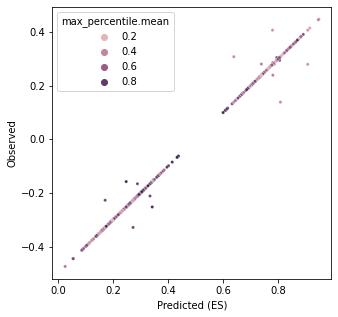

In [127]:
import seaborn as sns

plt.figure(figsize=(5,5))
data = pd.DataFrame()
data["Predicted (ES)"] = newd[newd["peak_overlap"]]["Effect_size_x"]
data["Observed"] = newd[newd["peak_overlap"]]["Effect_size_y"]-0.5
data["max_percentile.mean"] = abs(newd[newd["peak_overlap"]]["max_percentile.mean"])

sns.scatterplot(data=data, x="Predicted (ES)", y="Observed", hue="max_percentile.mean", s=10)


In [129]:
preds
before = pd.read_csv("/mnt/lab_data2/anusri/chrombpnet/results/variant_data/smc_caqtls/preds_fold0/snp_scores_bed_format_inpeaks.bed", sep="\t", header=None)

In [139]:
kk = preds.merge(before, left_on=["chr", "pos", "allele1", "allele2"], right_on=[0,1,3,4]).drop_duplicates()

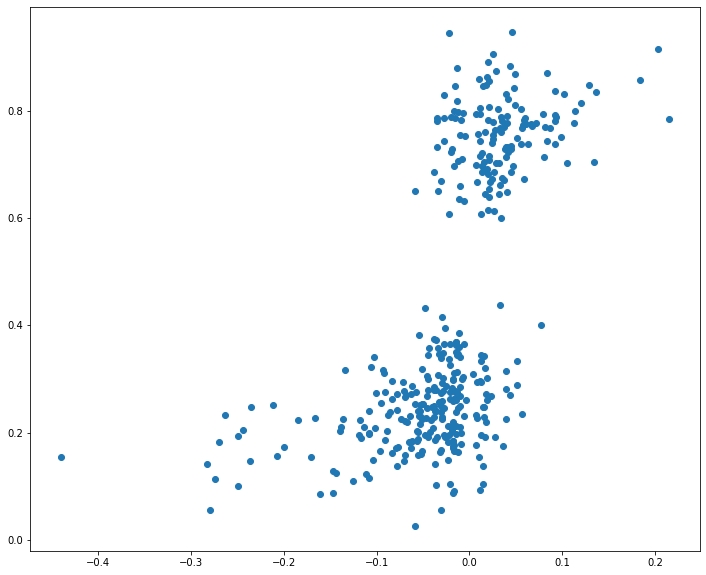

In [135]:
plt.scatter(before[8], before[20])

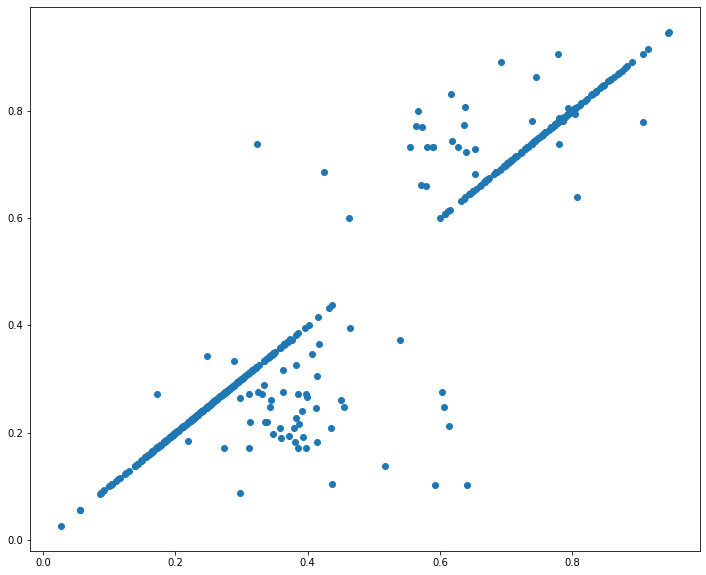

In [148]:
plt.scatter(kk["Effect_size"].astype(float), kk[20])

In [141]:
#kk.columns.tolist()

['chr',
 'pos',
 'allele1',
 'allele2',
 'rsid',
 'logfc.mean',
 'abs_logfc.mean',
 'abs_logfc.mean.pval',
 'jsd.mean',
 'jsd.mean.pval',
 'logfc_x_jsd.mean',
 'abs_logfc_x_jsd.mean',
 'abs_logfc_x_jsd.mean.pval',
 'max_percentile.mean',
 'max_percentile.mean.pval',
 'logfc_x_max_percentile.mean',
 'abs_logfc_x_max_percentile.mean',
 'abs_logfc_x_max_percentile.mean.pval',
 'jsd_x_max_percentile.mean',
 'jsd_x_max_percentile.mean.pval',
 'abs_logfc_x_jsd_x_max_percentile.mean',
 'abs_logfc_x_jsd_x_max_percentile.mean.pval',
 'logfc_x_jsd_x_max_percentile.mean',
 'Feature_ID',
 'rsID',
 'Chromosome',
 'SNP_position',
 'Ref_allele',
 'Alt_allele',
 'Freq',
 'HWE_Chisquare',
 'Imp_quality',
 'Log10_BH_Q',
 'Chisquare',
 'Effect_size',
 'Delta',
 'Phi',
 'Overdispersion',
 'SNP_id_region',
 'Num_feature_SNPs',
 'Num_tested_SNPs',
 'Num_iterations_null',
 'Num_iterations_alt',
 'Random_ties',
 'Log_likelihood_null',
 'Convergence_status',
 'Sq_corr_fSNPs',
 'Sq_corr_rSNP',
 'Log10_BF',
 'js